In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir("..")
from src.information_bottleneck import IB

In [2]:
X_HAT_STR = "X\u0302"
BETA = "\u03B2"

### Generate Random Joint Probability p(X=x, Y=y) 

In [3]:
pXY = np.column_stack((np.arange(9, 0, -1), np.arange(1, 10)))
pXY = pXY / np.sum(pXY)

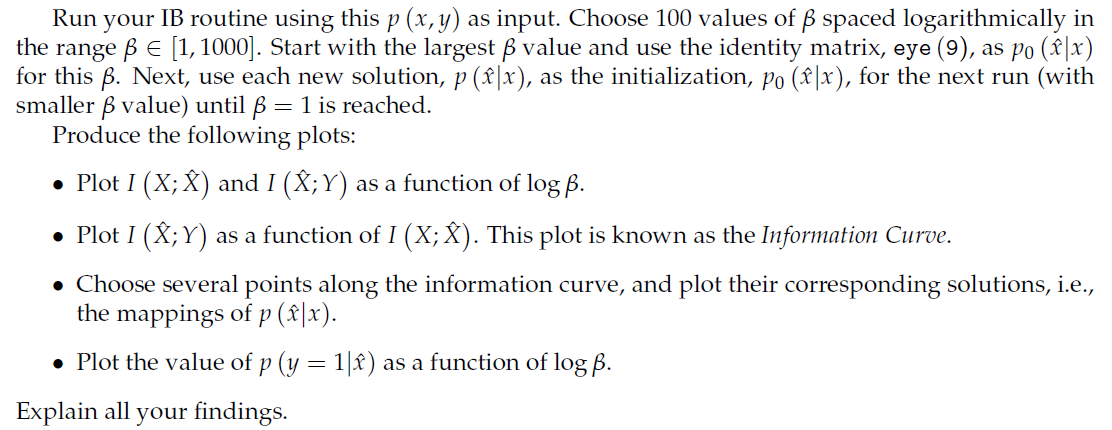

In [5]:
# init
p0Xhat_X = np.eye(pXY.shape[0])
beta = np.logspace(3,0, num=100 , base=10)
mi_compression = np.empty(len(beta))
mi_accuracy = np.empty(len(beta))
solutions = np.empty(shape=[len(beta),*p0Xhat_X.shape])
pY_Xhat = np.empty(shape=[len(beta),*pXY.shape[::-1]])

#apply
pXhat_X = p0Xhat_X
for i, b in enumerate(beta):
    results = IB(pXY, b, pXhat_X)
    mi_compression[i] = results["I(Xhat;X)"]
    mi_accuracy[i] = results["I(Xhat;Y)"]
    solutions[i,:,:] = results["p(Xhat|X)"]
    pY_Xhat[i,:,:] = results["p(Y|Xhat)"]

#### I(X; ˆX) and I(ˆX;Y) as a function of log b

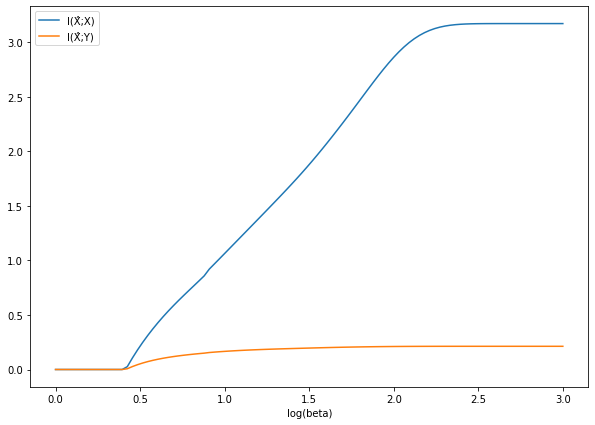

In [11]:
pd.DataFrame(
    {f"I({X_HAT_STR};X)":mi_compression, f"I({X_HAT_STR};Y)":mi_accuracy}, 
    index=np.log10(beta)
).plot(figsize=(10,7))

plt.xlabel("log(beta)")
plt.show()

I(Y|Xhat) is slightly saturated even when I(Xhat|X) increases. It implies that there is a limit to the amount of improvement that can be achieved in compression in order to improve accuracy

#### I(ˆX;Y) as a function of I(X; ˆX). This plot is known as the Information Curve.

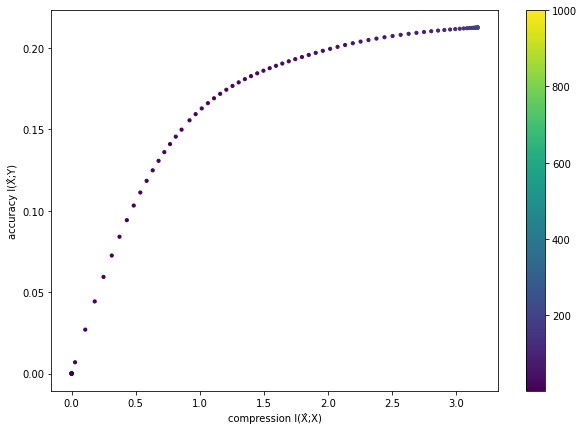

In [12]:
plt.figure(figsize=(10,7))
sc = plt.scatter(mi_compression, mi_accuracy, c=beta, s=10)
plt.colorbar(sc)
plt.xlabel(f"compression I({X_HAT_STR};X)")
plt.ylabel(f"accuracy I({X_HAT_STR};Y)")
plt.show()

We can be impressed by the non-linear trend of these two. Namely, a relatively small increasing in I(X;Xhat) results in a relatively large increasing in I(Y;Xhat).

#### Choose several points along the information curve, and plot their corresponding solutions, i.e., the mappings of p(ˆx|x).

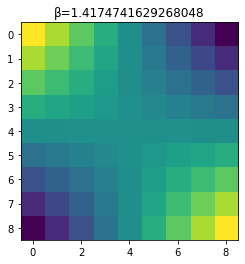

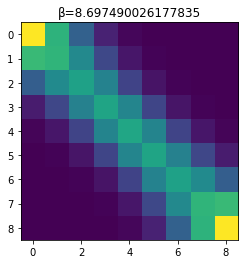

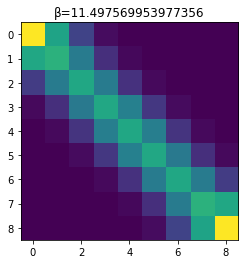

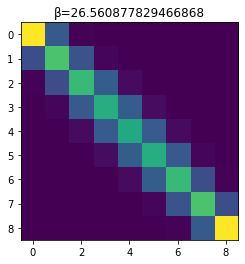

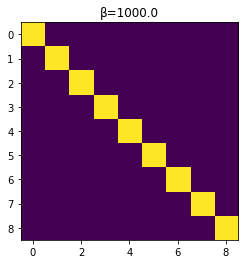

In [33]:
for point in np.sort(np.random.randint(len(solutions), size=5))[::-1]:
    plt.title(f"{BETA}={beta[point]}")
    plt.imshow(solutions[point])
    plt.show()

We see the mapping is deterministic (along its initial value) as long as beta keeps growing. This is caused by the lagrangian term - I(Xhat|X) has to increases in order to minimize the term for large beta's, thus the mapping between Xhat and X is clearer.

#### p(y = 1|ˆx) as a function of log b.

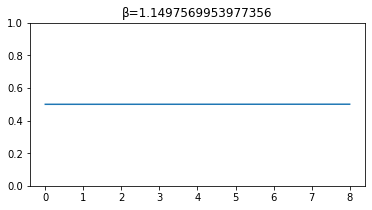

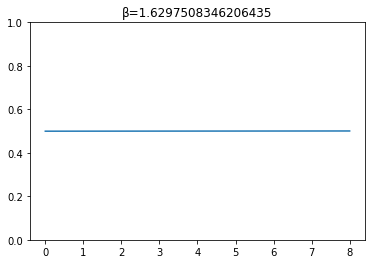

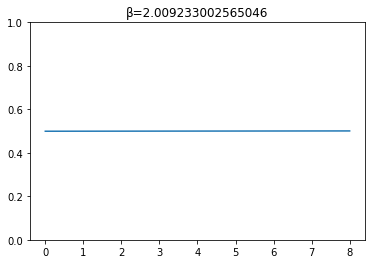

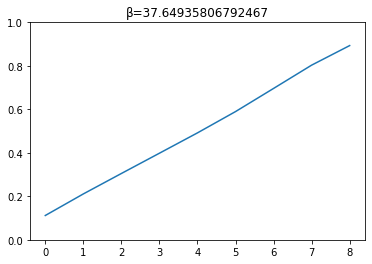

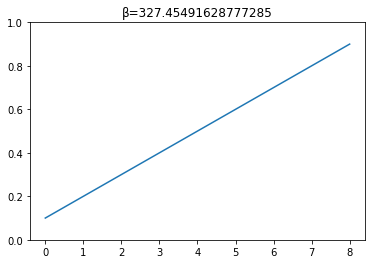

In [47]:
plt.figure(figsize=(6,3))
for point in np.sort(np.random.randint(len(solutions), size=5))[::-1]:
    plt.title(f"{BETA}={beta[point]}")
    plt.plot(pY_Xhat[point,1])
    plt.ylim(0.0, 1.0)
    plt.show()

For small beta's the compression doesn't tell a lot about the values of Y. When beta grows, the mutual information of the compressions and Y grows too, and the compression's values can predict more accuratly the Y values.